# 🚖 Taxi Trip Price Prediction

##  1. Importing Libraries

In [76]:
import numpy as np
import pandas as pd

📌 **Why?** These libraries are essential for data handling and numerical computations.

##  2. Loading the Dataset

In [77]:
df = pd.read_csv(r"C:\Users\diyap\OneDrive\Desktop\GitHub Projects\Datasets\taxi_trip_pricing.csv")

📌 **Why?** Reads the CSV file containing taxi trip data.

##  3. Exploring the Dataset

In [78]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [79]:
df.tail()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
995,5.49,Afternoon,Weekend,4.0,Medium,Clear,2.39,0.62,0.49,58.39,34.4049
996,45.95,Night,Weekday,4.0,Medium,Clear,3.12,0.61,NaN,61.96,62.1295
997,7.70,Morning,Weekday,3.0,Low,Rain,2.08,1.78,NaN,54.18,33.1236
998,47.56,Morning,Weekday,1.0,Low,Clear,2.67,0.82,0.17,114.94,61.2090
999,22.85,Morning,Weekend,3.0,Medium,Clear,4.34,NaN,0.23,29.69,45.4437


In [80]:
df.shape

(1000, 11)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [82]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [83]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

🔍 **What's happening?**
- `head()` & `tail()` show the first and last 5 rows.
- `shape` gives dimensions.
- `info()` summarizes column types.
- `describe()` provides statistical insights.
- `isnull().sum()` checks missing values.

##  4. Handling Missing Values

### 🎭 Categorical Data

In [84]:
categorical_columns = ["Time_of_Day" , "Day_of_Week" , "Traffic_Conditions" , "Weather"]
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode().iloc[0])

### 🔢 Numerical Data

In [85]:
numerical_columns = ["Trip_Distance_km" , "Passenger_Count" , "Base_Fare" , "Per_Km_Rate" , "Per_Minute_Rate" , "Trip_Duration_Minutes" , "Trip_Price"]
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

📌 **Why?**
- **Mode** fills missing categorical values.
- **Median** fills missing numerical values.

##  5. Data Visualization

### 🕒 Trips by Time of Day

C:\Users\diyap\AppData\Local\Temp\ipykernel_8600\4186884699.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Time_of_Day", data=df, palette="viridis")


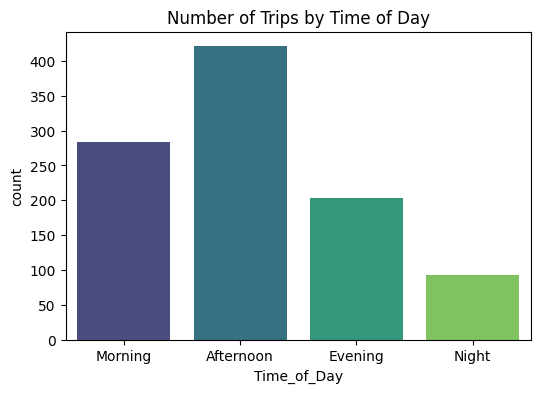

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.countplot(x="Time_of_Day", data=df, palette="viridis")
plt.title("Number of Trips by Time of Day")
plt.show()

### 🌦 Trip Price by Weather

C:\Users\diyap\AppData\Local\Temp\ipykernel_8600\3759690677.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Weather", y="Trip_Price", data=df, palette="muted")


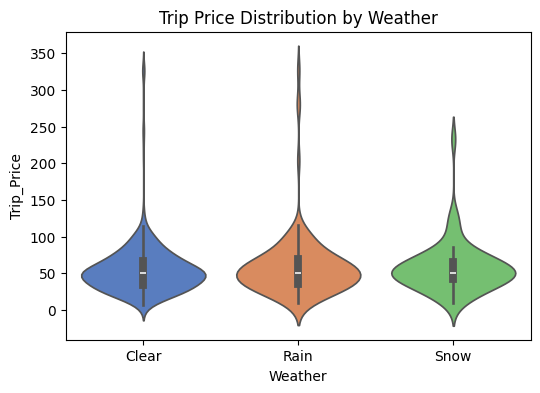

In [87]:
plt.figure(figsize=(6, 4))
sns.violinplot(x="Weather", y="Trip_Price", data=df, palette="muted")
plt.title("Trip Price Distribution by Weather")
plt.show()

### 🚦 Trip Price vs. Duration (Traffic Conditions)

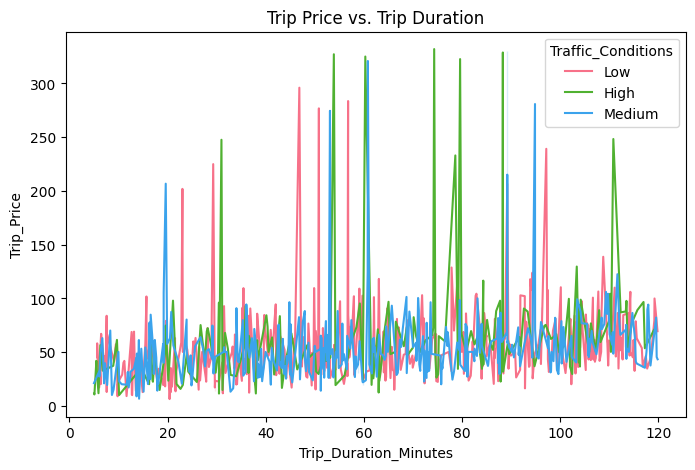

In [88]:
plt.figure(figsize=(8, 5))
sns.lineplot(x="Trip_Duration_Minutes", y="Trip_Price", hue="Traffic_Conditions", data=df, palette="husl")
plt.title("Trip Price vs. Trip Duration")
plt.show()

### 🔥 Correlation Heatmap

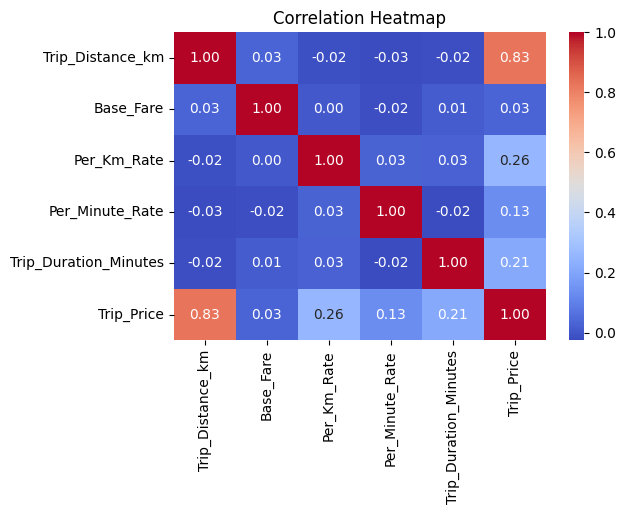

In [89]:
plt.figure(figsize=(6, 4))
correlation = df[["Trip_Distance_km", "Base_Fare", "Per_Km_Rate", "Per_Minute_Rate", "Trip_Duration_Minutes", "Trip_Price"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##  6. Encoding Categorical Variables

In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

📌 **Why?** Machine learning models work better with numerical data.

##  7. Splitting Data

In [91]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=["Trip_Price"])
y = df["Trip_Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

📌 **Why?** Splits data into training (80%) and testing (20%).

##  8. Feature Scaling

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

📌 **Why?** Standardizes numerical values for better model performance.

##  9. Training Models

### 📉 Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f"R-squared: {r2_score(y_test, y_pred)}")

R-squared: 0.8135788518927624


### 🔗 Ridge Regression

In [94]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred2 = ridge.predict(x_test)
print(f"R-squared: {r2_score(y_test, y_pred2)}")

R-squared: 0.8134837126568766


### 🏹 *Lasso Regression*

In [95]:
lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"🎯 R-squared (Lasso Regression): {r2_lasso}")

🎯 R-squared (Lasso Regression): 0.8136929906754083


### 🌲 Random Forest

In [96]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)
print(f"R-squared (Random Forest): {r2_score(y_test, y_pred_rf)}")

R-squared (Random Forest): 0.9275868247510334


### 🚀 Gradient Boosting

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boost.fit(x_train, y_train)
y_pred_gb = gradient_boost.predict(x_test)
print(f"R-squared (Gradient Boosting): {r2_score(y_test, y_pred_gb)}")

R-squared (Gradient Boosting): 0.9221990956868225


##  10. Comparing Model Performance

C:\Users\diyap\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


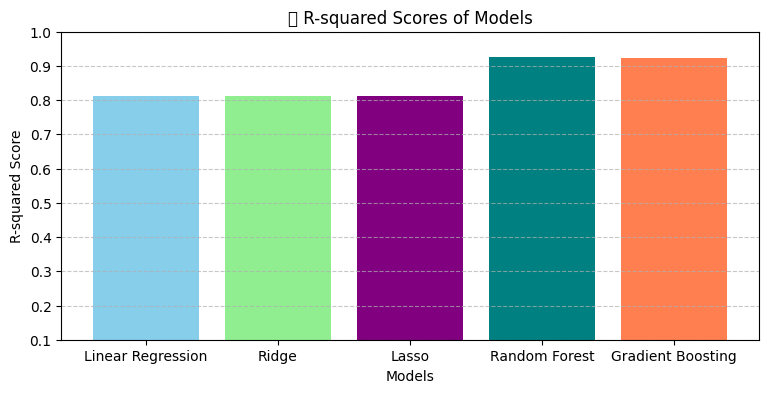

In [99]:
models = ['Linear Regression', 'Ridge', 'Lasso', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.8135, 0.8134, 0.8136, 0.9275, 0.9221]
plt.figure(figsize=(9, 4))
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'purple', 'teal', 'coral'])
plt.title('🏆 R-squared Scores of Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.ylim(0.1, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

📌 **Why?** Visualizes model accuracy.

# 🏁 **Conclusion**
### 🚖 In the **Taxi Trip Price Prediction** project, various models were tested.
### 🌳 The **Random Forest model achieved the highest R² score (~0.92)**, making it the best predictor!
### 📉 **Lasso Regression helped in feature selection** but had a slightly lower accuracy.
### 💡 **Gradient Boosting also performed well**, while Linear & Ridge Regression had moderate performance.

### 🎯 **Final Thought:** Ensemble models like **Random Forest & Gradient Boosting** are great for price prediction!